In [25]:
from myhdl import *
from myhdlpeek import *
import random as n

In [64]:
def ins_Memory(address, clk, current_ins):
    # binaryfile = open("Instructions.txt", "rb")
    # binaryfile = open("instructions", "rb")
    binaryfile = open("instructions2", "rb")
    # ins_memory = [intbv(0)[32:] for _ in range(44)]
    ins_memory = []
    i = 0
    for line in binaryfile:
        ins_memory.append(intbv(line.decode('utf-8')))
        print(ins_memory)

    @always(address)
    def memory_Behave():
        print("NEW INSTRUCTION ALERT!!!!!------------------")
        print(address)
        print("ins_Memory[address] = "+str(ins_memory[address]))
        current_ins.next = ins_memory[address]

    return instances()

In [27]:
def pc(clk, current_address, next_ins):
    @always(clk.posedge)
    def pc_Behave():
        current_address.next = next_ins

    return instances()

In [28]:
def adder(current_address, adder_out):
    @always_comb
    def Adder_behave():
        adder_out.next = current_address + 1

    return instances()

Decoding (Bit Slicing)

In [29]:
def decode(current_ins, opcode, rs, rt, rd, funct, shamt, imm):
    @always_comb
    def decode_Behave():
        opcode.next = current_ins[32:26]
        rs.next = current_ins[26:21]
        rt.next = current_ins[21:16]
        # r - type
        rd.next = current_ins[16:11]
        shamt.next = current_ins[11:6]
        funct.next = current_ins[6:]
        # i - type
        print("Imm = " + str(current_ins[16:]))
        imm.next = current_ins[16:]

    return instances()

Memory and Decode Testbench

In [30]:
# Peeker.clear()
# current_ins = Signal(intbv(0)[32:])
# opcode = Signal(intbv(0)[6:])
# funct = Signal(intbv(0)[6:])
# clk = Signal(bool(0))
# current_address = Signal(intbv(0)[32:])
# next_address = Signal(intbv(0)[32:])
# next_ins = Signal(intbv(0)[32:])
# imm = Signal(intbv(0)[16:])
# # -------------------------
#
# rs, rt, rd, shamt = [Signal(intbv(0)[5:]) for _ in range(4)]  # Integer signals for the inputs & output.
#
# # Create some Peekers to monitor the multiplexer I/Os.
# Peeker(current_address, 'current address')
# Peeker(current_ins, 'current')  # Add a Peeker to the a input.
# Peeker(opcode, 'opcode')  # Add a Peeker to the b input.
# Peeker(rs, 'rs')  # Add a peeker to the z output.
# Peeker(rt, 'rt')  # Add a Peeker to the select input. The Peeker label doesn't have to match the signal name.
# Peeker(rd, 'rd')
# Peeker(funct, 'funct')  # Add a Peeker to the a input.
# Peeker(shamt, 'shamt')  # Add a Peeker to the b input.
# Peeker(imm, 'imm')  # Add a peeker to the z output.
#
# # Instantiate the multiplexer.
# pc_inst = pc(clk, current_address, next_ins)
# adder_inst = adder(current_address, next_ins)
# memory_inst = ins_Memory(current_address, clk, current_ins)
# decode_inst = decode(current_ins, opcode, rs, rt, rd, funct, shamt, imm)
#
#
# # Create a test process to apply random patterns to the multiplexer.
#
#
# def testDecode():
#     '''Simple testbed generator that applies random inputs to the multiplexer.'''
#
#     @instance
#     def invertClk():
#         for i in range(7):
#             clk.next = 1
#             yield delay(1)
#             clk.next = 0
#             yield delay(1)
#
#     return instances()
#
#
# # Create a simulator for the multiplexer, test process and the peekers.
# sim = Simulation(decode_inst, memory_inst, adder_inst, pc_inst, testDecode(), *Peeker.instances())
#
# # Run the simulation.
# sim.run()
#
# # Display the complete waveforms captured by all the Peekers.
# Peeker.show_waveforms(width=90)
#
# # Clear the Peekers for the next simulation.
# Peeker.clear()

In [31]:
def control(opcode, funct, reg_dest, mem_read, mem_to_reg, alu_op, mem_write, alu_src, reg_write, branch):
    @always_comb
    def control_behave():
        # ------------------- r - type -----------------
        if int(opcode) == 0:
            alu_src.next = 0
            if int(funct) == 32:  # ADD
                reg_dest.next = 1
                reg_write.next = 1
                alu_src.next = 0
                alu_op.next = 2
                mem_write.next = 0
                mem_read.next = 0
                mem_to_reg.next = 0
                branch.next = 0

            elif int(funct) == 34:  # SUB
                reg_dest.next = 1
                reg_write.next = 1
                alu_src.next = 0
                alu_op.next = 6
                mem_write.next = 0
                mem_read.next = 0
                mem_to_reg.next = 0
                branch.next = 0

            elif int(funct) == 54:  # AND
                reg_dest.next = 1
                reg_write.next = 1
                alu_src.next = 0
                alu_op.next = 0
                mem_write.next = 0
                mem_read.next = 0
                mem_to_reg.next = 0
                branch.next = 0

            elif int(funct) == 55:  # OR
                reg_dest.next = 1
                reg_write.next = 1
                alu_src.next = 0
                alu_op.next = 1
                mem_write.next = 0
                mem_read.next = 0
                mem_to_reg.next = 0
                branch.next = 0

            elif int(funct) == 56:  # XOR
                reg_dest.next = 1
                reg_write.next = 1
                alu_src.next = 0
                alu_op.next = 3
                mem_write.next = 0
                mem_read.next = 0
                mem_to_reg.next = 0
                branch.next = 0

        # ------------------- i - type -----------------

        elif int(opcode) == 8:  # ADDI
            reg_dest.next = 0
            reg_write.next = 1
            alu_src.next = 1
            alu_op.next = 2
            mem_write.next = 0
            mem_read.next = 0
            mem_to_reg.next = 0
            branch.next = 0

        elif int(opcode) == 36:  # SUBI
            reg_dest.next = 0
            reg_write.next = 1
            alu_src.next = 1
            alu_op.next = 6
            mem_write.next = 0
            mem_read.next = 0
            mem_to_reg.next = 0
            branch.next = 0

        elif int(opcode) == 35:  # LW
            reg_dest.next = 0
            reg_write.next = 1
            alu_src.next = 1
            alu_op.next = 2
            mem_write.next = 0
            mem_read.next = 1
            mem_to_reg.next = 1
            branch.next = 0

        elif int(opcode) == 43:  # SW
            reg_dest.next = 0  # NO NEED
            reg_write.next = 0
            alu_src.next = 1
            alu_op.next = 2
            mem_write.next = 1
            mem_read.next = 0
            mem_to_reg.next = 0  # NO NEED
            branch.next = 0

        elif int(opcode) == 4:  # BEQ
            reg_dest.next = 0  # NO NEED
            reg_write.next = 0
            alu_src.next = 0
            alu_op.next = 6
            mem_write.next = 0
            mem_read.next = 0
            mem_to_reg.next = 0  # NO NEED
            branch.next = 1

    return instances()

In [32]:
def mux_5(reg_dest, rt, rd, mux_5_out):
    @always_comb
    def mux_5_Behave():
        if reg_dest == 0:
            mux_5_out.next = rt
        else:
            mux_5_out.next = rd

    return instances()

In [33]:
def mux_32(decider, inp1, inp2, mux_32_out):
    @always_comb
    def mux_32_Behave():
        if decider == 0:
            mux_32_out.next = inp1
        else:
            mux_32_out.next = inp2

    return instances()

In [34]:
def mux_4(decider, inp1, inp2, mux_4_out):
    @always(clk.posedge)
    def mux_4_Behave():
        print("and gate result = " + str(decider))
        if decider == 0:
            mux_4_out.next = inp1
        else:
            mux_4_out.next = inp2

    return instances()

In [35]:
def sign_Ext(imm, sign_ext_out):
    @always_comb
    def sign_Ext_Behave():
        print("immediate = " + str(imm))
        sign_ext_out.next = imm

        bin(imm,width=32)
        # bin_string = str(bin(imm))
        # if len(bin_string) != 16:
        #     pos = "0000000000000000" + bin_string
        #     posfil = pos.zfil(32)
        #     print("Posfil" + str(posfil))
        #     sign_ext_out.next = intbv(posfil)
        # else:
        #     neg = "1111111111111111" + bin_string
        #     print("Neg = " + str(neg))
        #     sign_ext_out.next = intbv(neg)

    return instances()


In [36]:
def alu(rd1, mux_out, alu_op, alu_out, zero):
    @always_comb
    def alu_Behave():
        if alu_op == 2:  # add
            alu_out.next = rd1 + mux_out
            if rd1 + mux_out == 0:  # to check the zero line output
                zero.next = 1
            else:
                zero.next = 0


        elif alu_op == 6:  # sub
            alu_out.next = rd1 - mux_out  # alu_out
            if rd1 - mux_out == 0:  # to check the zero line output
                zero.next = 1
            else:
                zero.next = 0

        elif alu_op == 0:  # and
            alu_out.next = rd1 & mux_out
            if rd1 & mux_out == 0:  # to check the zero line output
                zero.next = 1
            else:
                zero.next = 0

        elif alu_op == 1:  # or
            alu_out.next = rd1 | mux_out
            if rd1 | mux_out == 0:  # to check the zero line output
                zero.next = 1
            else:
                zero.next = 0

        elif alu_op == 3:  # xor
            alu_out.next = rd1 ^ mux_out
            if rd1 ^ mux_out == 0:  # to check the zero line output
                zero.next = 1
            else:
                zero.next = 0

    return instances()

In [37]:
def data_memory(clk, address, data, mem_write, mem_read, read_data):
    array = [Signal(intbv(0)[:32])] * 65535
    # print("array length: " + str(len(array)))

    @always(clk.posedge)
    def write():
        if mem_write:
            print(mem_write)
            print("data_memory address Write: " + str(address))
            array[address] = data
            print("array[address] = "+str(array[address]))
            #array[address].next = data

    @always(clk.negedge)
    def read():
        if mem_read:
            print("data_memory Read: " + str(address))
            read_data.next = array[address]

    return instances()

In [57]:
def reg_file(clk, read_reg1, read_reg2, reg_write, write_reg, write_data, read_data1, read_data2):
    # array = [Signal(intbv(0)[:32])] * 32
    array = [5,2,1,4,5,6,7,8,4,3,5,2,1,4,5,6,7,8,4,3,5,2,1,4,5,6,7,8,4,3,5,1]

    print("array[10]: " + str(array[10]))
    print("array[15]: " + str(array[15]))
    # for i in range(len(reg)):
    #     array[i] = Signal(intbv(reg[i]))
    # read_data1.next = array[int(read_reg1)]
    # read_data2.next = array[int(read_reg2)]

    @always(clk.posedge)
    def read():
        read_data1.next = array[read_reg1]
        read_data2.next = array[read_reg2]
        print("read reg1 = " + str(read_reg1))
        print("read reg2 = " + str(read_reg2))
        print("read data1 = " + str(read_data1))
        print("read data2 = " + str(read_data2))
    @always(clk.negedge)
    def write():
        if reg_write == 1:
            array[write_reg] = write_data
            #array[write_reg].next = write_data

        print("reg_file To be written: "+ str(write_data))

    return instances()

In [39]:
def branch_Adder(adder1_out,sign_ext_out,add_result):
    @always_comb
    def b_Adder_Behave():
        print("Sign Extend Output = " + str(sign_ext_out))
        print("Branch Adder = " + str((sign_ext_out + adder1_out)))
        add_result.next = sign_ext_out + adder1_out
    return instances()

In [40]:
def and_Gate(a,b,and_out):
    @always_comb
    def and_Behave():
        print("Branch = " + str(a))
        print("Zero = " + str(b))
        and_out.next = a and b
    return instances()

Control Unit Testbench

In [41]:
# Peeker.clear()
#
# current_ins = Signal(intbv(0)[32:])
# opcode = Signal(intbv(0)[6:])
# funct = Signal(intbv(0)[6:])
# clk = Signal(bool(0))
# current_address = Signal(intbv(0)[32:])
# next_address = Signal(intbv(0)[32:])
# next_ins = Signal(intbv(0)[32:])
# imm = Signal(intbv(0)[16:])
# rs, rt, rd, shamt = [Signal(intbv(0)[5:]) for _ in range(4)]  # Integer signals for the inputs & output.
# # -------------------------
# # control signals
# reg_dst = Signal(bool(0))
# branch = Signal(bool(0))
# mem_read = Signal(bool(0))
# mem_to_reg = Signal(bool(0))
# alu_op = Signal(intbv(0)[3:])
# mem_write = Signal(bool(0))
# alu_src = Signal(bool(0))
# reg_write = Signal(bool(0))
#
# # Create some Peekers to monitor the multiplexer I/Os.
# Peeker(current_address, 'current address')
# Peeker(current_ins, 'current')  # Add a Peeker to the a input.
# Peeker(opcode, 'opcode')  # Add a Peeker to the b input.
# Peeker(rs, 'rs')  # Add a peeker to the z output.
# Peeker(rt, 'rt')  # Add a Peeker to the select input. The Peeker label doesn't have to match the signal name.
# # Peeker(rd, 'rd')
# # Peeker(funct, 'funct')  # Add a Peeker to the a input.
# # Peeker(shamt, 'shamt')  # Add a Peeker to the b input.
# Peeker(imm, 'imm')  # Add a peeker to the z output.
# Peeker(alu_op, 'ALU Operation')
#
# # Instantiation
# pc_inst = pc(clk, current_address, next_ins)
# adder_inst = adder(current_address, next_ins)
# memory_inst = ins_Memory(current_address, clk, current_ins)
# decode_inst = decode(current_ins, opcode, rs, rt, rd, funct, shamt, imm)
# #----------------------
# control_inst = control(opcode, funct, reg_dst, mem_read, mem_to_reg, alu_op, mem_write, alu_src, reg_write, branch)
#
#
# # Create a test process to apply random patterns to the multiplexer.
#
#
# def testDecode():
#     '''Simple testbed generator that applies random inputs to the multiplexer.'''
#
#     @instance
#     def invertClk():
#         for i in range(43):
#             clk.next = 1
#             yield delay(1)
#             clk.next = 0
#             yield delay(1)
#
#     return instances()
#
#
# # Create a simulator for the multiplexer, test process and the peekers.
# sim = Simulation(decode_inst, memory_inst, adder_inst, pc_inst, control_inst, testDecode(), *Peeker.instances())
#
# # Run the simulation.
# sim.run()
#
# # Display the complete waveforms captured by all the Peekers.
# Peeker.show_waveforms(width=90)
#
# # Clear the Peekers for the next simulation.
# Peeker.clear()


Testbench

hereEEEEEEEEEEEEEEEEEEEEEE is the pc=-1
[intbv(32139296)]
[intbv(32139296), intbv(28756002)]
[intbv(32139296), intbv(28756002), intbv(307363842)]
[intbv(32139296), intbv(28756002), intbv(307363842), intbv(590678801)]
[intbv(32139296), intbv(28756002), intbv(307363842), intbv(590678801), intbv(39151672)]
[intbv(32139296), intbv(28756002), intbv(307363842), intbv(590678801), intbv(39151672), intbv(2933325882)]
[intbv(32139296), intbv(28756002), intbv(307363842), intbv(590678801), intbv(39151672), intbv(2933325882), intbv(2373451834)]
array[10]: 5
array[15]: 6
immediate = 0
Branch = False
Zero = False
Sign Extend Output = 00000000
Branch Adder = 0
Imm = 0000
Branch = False
Zero = 1
read reg1 = 0
read reg2 = 0
read data1 = 0
read data2 = 0
and gate result = False
and gate result = False
NEW INSTRUCTION ALERT!!!!!------------------
0
ins_Memory[address] = 001ea6820
Sign Extend Output = 00000000
Branch Adder = 1
Imm = 6820
Branch = False
Zero = 0
immediate = 6820
Sign Extend Output = 0000682

<class 'myhdl.StopSimulation'>: No more events


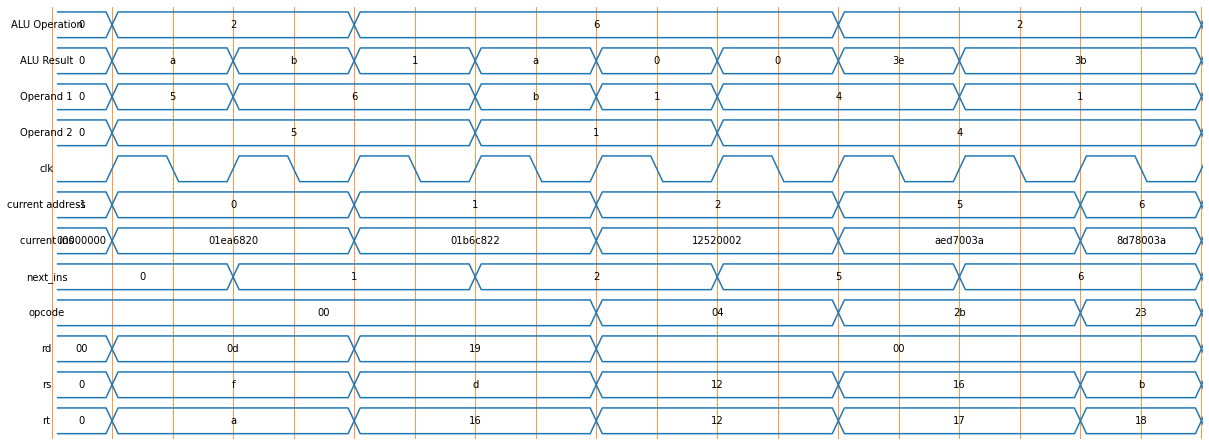

In [68]:
Peeker.clear()
current_ins = Signal(intbv(0)[32:])
opcode = Signal(intbv(0)[6:])
funct = Signal(intbv(0)[6:])
clk = Signal(bool(0))
current_address = Signal(intbv(-1))
next_address = Signal(intbv(0))
next_ins = Signal(intbv(0))
pc_adder_out = Signal(intbv(0))
imm = Signal(intbv(0))
rs = Signal(intbv(15))
rt = Signal(intbv(10))
rd, shamt = [Signal(intbv(0)[5:]) for _ in range(2)]  # Integer signals for the inputs & output.
# -------------------------
# control signals
reg_dst = Signal(bool(0))
branch = Signal(bool(0))
mem_read = Signal(bool(0))
mem_to_reg = Signal(bool(0))
alu_op = Signal(intbv(0)[3:])
mem_write = Signal(bool(0))
alu_src = Signal(bool(0))
reg_write = Signal(bool(0))
#--------------------------
# mux output signals
mux1_out = Signal(intbv(0)[5:])
mux2_out = Signal(intbv(0)) # edited
mux3_out = Signal(intbv(0)) # for data memory
#------------------------------
and_out = Signal(bool(0))
add_result_out = Signal(intbv(0)[32:])
#------------------------------
sign_ext_out = Signal(intbv(0)[32:])
#------------------------------
# register file output signals
read_data1 = Signal(intbv(0)) # edited
read_data2 = Signal(intbv(0))
#------------------------------
# data memory register
read_data = Signal(intbv(0))
#------------------------------
# alu output signals
zero = Signal(bool(0))
alu_result = Signal(intbv(0))

# Create some Peekers to monitor the multiplexer I/Os.
Peeker(clk,'clk')
Peeker(current_address, 'current address')
Peeker(current_ins, 'current ins')  # Add a Peeker to the a input.
Peeker(next_ins, 'next_ins')
Peeker(rs, 'rs')  # Add a peeker to the z output.
Peeker(rt, 'rt')  # Add a Peeker to the select input. The Peeker label doesn't have to match the signal name.
Peeker(rd, 'rd')
# # Peeker(funct, 'funct')  # Add a Peeker to the a input.
# # Peeker(shamt, 'shamt')  # Add a Peeker to the b input.
# Peeker(imm, 'imm')  # Add a peeker to the z output.
Peeker(alu_op, 'ALU Operation')
Peeker(opcode, 'opcode')
Peeker(alu_result, 'ALU Result')
Peeker(read_data1, 'Operand 1')
Peeker(read_data2, 'Operand 2')


# Instantiation
pc_inst = pc(clk,current_address,next_ins)
print("hereEEEEEEEEEEEEEEEEEEEEEE is the pc=" + str(current_address))
adder_inst = adder(current_address, pc_adder_out)
memory_inst = ins_Memory(current_address, clk, current_ins)
decode_inst = decode(current_ins, opcode, rs, rt, rd, funct, shamt, imm)
#----------------------
control_inst = control(opcode, funct, reg_dst, mem_read, mem_to_reg, alu_op, mem_write, alu_src, reg_write, branch)
#----------------------
mux1_inst = mux_5(reg_dst, rt, rd, mux1_out)
mux2_inst = mux_32(alu_src, read_data2, sign_ext_out, mux2_out)
#----------------------
sign_ext_inst = sign_Ext(imm,sign_ext_out)
#------------------------------------------------------alu_result change after testing to mux3_out
registers_inst = reg_file(clk, rs, rt, reg_write, mux1_out, mux3_out, read_data1, read_data2)
#----------------------
alu_inst = alu(read_data1, mux2_out, alu_op, alu_result, zero)
#----------------------
# branch zone
b_adder_inst = branch_Adder(pc_adder_out,sign_ext_out,add_result_out)
and_inst = and_Gate(branch,zero,and_out)
mux4_inst = mux_4(and_out,pc_adder_out,add_result_out,next_ins)
#----------------------
# data memory zone
data_memory_inst = data_memory(clk,alu_result,read_data2,mem_write,mem_read,read_data)
mux3_inst = mux_4(mem_to_reg,alu_result,read_data,mux3_out)

# Create a test process to apply random patterns to the multiplexer.


def testDecode():
    '''Simple testbed generator that applies random inputs to the multiplexer.'''

    @instance
    def invertClk():
        for i in range(10):
            clk.next = 0
            yield delay(1)
            clk.next = 1
            yield delay(1)
    return instances()


# Create a simulator for the multiplexer, test process and the peekers.
sim = Simulation(decode_inst, memory_inst, adder_inst, pc_inst, mux1_inst, mux2_inst, registers_inst, alu_inst,
                 control_inst,b_adder_inst,and_inst,mux4_inst,mux3_inst,data_memory_inst,sign_ext_inst, testDecode(), *Peeker.instances())

# Run the simulation.
sim.run()

# Display the complete waveforms captured by all the Peekers.
Peeker.show_waveforms(width=20)
# Clear the Peekers for the next simulation.
Peeker.clear()